# **AIN 214 - PA4 - FALL 2024**




**Student Number** :2220765041

**Name Surname**   : Sude Naz Öztürk


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 13.12.2024 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>



---


# **Building kNN and Logistic Regression Classifiers**

---
**Dataset Path:** "Data/stroke.csv"
---

We will deal with the stroke dataset. The dataset contains demographic and health-related data to predict whether a patient is likely to have a stroke.

**Features:**


* id: Unique identifier (can be ignored for modeling).
* gender: Gender of the patient (categorical).
* age: Age of the patient (numerical).
* hypertension: Whether the patient has hypertension (0 = No, 1 = Yes).
* heart_disease: Whether the patient has heart disease (0 = No, 1 = Yes).
* ever_married: Marital status (categorical).
* work_type: Type of work (categorical).
* Residence_type: Rural or Urban (categorical).
* avg_glucose_level: Average glucose level (numerical).
* bmi: Body Mass Index (numerical).
* smoking_status: Smoking habits (categorical).
* stroke: Target variable (1 = Stroke, 0 = No Stroke).

# **Necessary Imports**

In [80]:
# Import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve, auc
from scipy.stats._mstats_basic import winsorize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

# **PART- 1: Data Preprocessing and Visualization (35 Pts)**

---

## 1.1. Explaratory Data Analysis (20 Pts)

* Load the dataset
* Check and Handle Missing Values

  * Identify columns with missing values.
  * Replace missing values using suitable methods (mean or median imputation).

* Check and Handle Outliers

  * Detect outliers in numerical features
  * Handle outliers appropriately

* Convert categorical variables into numerical values.
* Perform data normalization



In [81]:
# Load the dataset
first_df = pd.read_csv('Data/stroke.csv')
first_df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [82]:
# Check missing values
print(first_df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


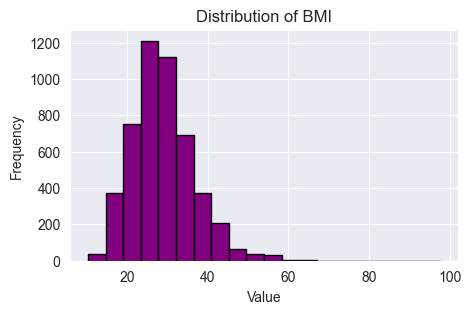

In [83]:
# Only bmi column has NAN values so, we have to look at its plot.
# Distribution of BMI
first_df['bmi'].hist(bins=20, color = 'purple', edgecolor='k', figsize=(5,3))
plt.title('Distribution of BMI')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# According to this plot, bmi values have some outlier in it because of that we will use median imputation. Median is not affected by outliers.

In [84]:
# Handle missing values with Median Imputation

# Find NAN values
nan_values_in_bmi = first_df['bmi'].isna()

# Find bmi columns median
median_value = first_df['bmi'].median()

# Fill nan values with median
first_df.loc[nan_values_in_bmi, 'bmi'] = median_value

# Cehck missing values again
print(first_df.isnull().sum())


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


Number of outlier in average glucose level feature:  627
Number of outlier in bmi feature:  126
Number of numerical outliers:  719
Numerical Outliers: [0, 1, 3, 4, 5, 13, 14, 16, 17, 19, 20, 21, 22, 23, 27, 28, 29, 30, 32, 33, 36, 44, 45, 54, 55, 57, 58, 59, 60, 66, 71, 73, 76, 90, 95, 97, 101, 102, 107, 113, 115, 122, 123, 124, 128, 130, 132, 134, 135, 137, 138, 139, 144, 149, 150, 151, 155, 157, 158, 163, 175, 179, 187, 189, 190, 193, 195, 196, 201, 212, 215, 217, 218, 219, 220, 222, 225, 226, 233, 234, 235, 241, 242, 243, 254, 256, 258, 270, 272, 277, 278, 293, 298, 303, 307, 314, 318, 325, 326, 330, 331, 332, 333, 337, 341, 343, 350, 355, 358, 360, 365, 368, 386, 396, 399, 411, 415, 417, 426, 429, 430, 433, 436, 444, 456, 462, 466, 467, 468, 477, 479, 492, 493, 515, 539, 544, 549, 551, 552, 559, 563, 570, 576, 581, 583, 585, 595, 598, 599, 610, 616, 620, 622, 637, 642, 662, 672, 706, 708, 715, 719, 744, 746, 755, 761, 762, 770, 785, 805, 816, 846, 848, 851, 860, 865, 867, 880, 887,

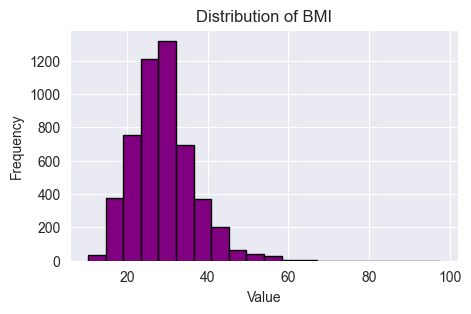

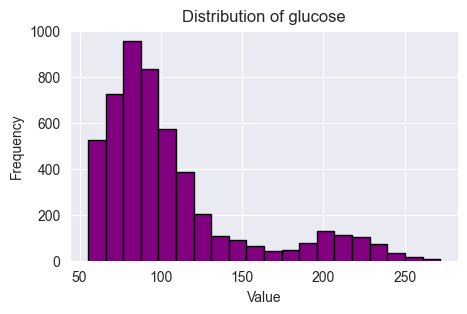

In [85]:
# Detect outliers in numerical features
# I use IQR method for outlier detection for numerical values

numerical_outliers = []
numerical_col = ['avg_glucose_level','bmi']

def outlier_finder(feature):
    outliers_of_feature = []
    Q1 = first_df[feature].quantile(0.25)
    Q3 = first_df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = first_df[(first_df[feature] < lower) | (first_df[feature] > upper)]
    outliers_of_feature.extend(outliers.index)

    return outliers_of_feature

glucose_outliers = outlier_finder('avg_glucose_level')
print("Number of outlier in average glucose level feature: ", len(glucose_outliers))

bmi_outliers = outlier_finder('bmi')
print("Number of outlier in bmi feature: ", len(bmi_outliers))

numerical_outliers.extend(glucose_outliers)
numerical_outliers.extend(bmi_outliers)

# Delete duplicates
numerical_outliers = list(set(numerical_outliers))

numerical_outliers.sort()

print("Number of numerical outliers: ",len(numerical_outliers))

print("Numerical Outliers:", numerical_outliers)

first_df['bmi'].hist(bins=20, color = 'purple', edgecolor='k', figsize=(5,3))
plt.title('Distribution of BMI')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

first_df['avg_glucose_level'].hist(bins=20, color = 'purple', edgecolor='k', figsize=(5,3))
plt.title('Distribution of glucose')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

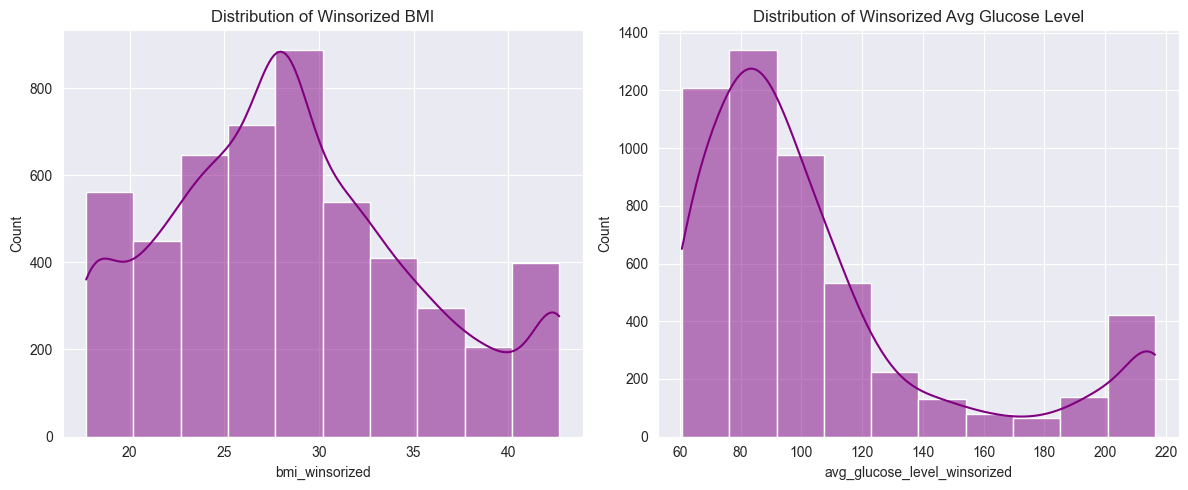

In [86]:
# I use winsorization to handle outliers.

def winsorize_column(data, column, lower_limit=0.05, upper_limit=0.05):
    """
    Apply winsorization to a column in the DataFrame.
    lower_limit: proportion of values to replace with lower boundary
    upper_limit: proportion of values to replace with upper boundary
    """
    data[f"{column}_winsorized"] = winsorize(data[column], limits=[lower_limit, upper_limit])
    return data

# Apply winsorization to bmi column and avg_glucose_level column
first_df = winsorize_column(first_df, 'bmi', lower_limit=0.05, upper_limit=0.05)
first_df = winsorize_column(first_df, 'avg_glucose_level', lower_limit=0.05, upper_limit=0.05)

first_df.drop('bmi', axis=1, inplace=True)
first_df.drop('avg_glucose_level', axis=1, inplace=True)

# Visualize the effect of winsorization
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(first_df['bmi_winsorized'], bins=10, color='purple', kde=True)
plt.title('Distribution of Winsorized BMI')

plt.subplot(1, 2, 2)
sns.histplot(first_df['avg_glucose_level_winsorized'], bins=10, color='purple', kde=True)
plt.title('Distribution of Winsorized Avg Glucose Level')

plt.tight_layout()
plt.show()

In [87]:
# Find answers for categorical variables before convert them into numerical
a = first_df['work_type'].unique()
print(a)

b = first_df['smoking_status'].unique()
print(b)

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [88]:
# Convert categorical variables into numerical values.

new_df = first_df.copy()
new_df['gender_encoded'] = new_df['gender'].map({'Female': 0, 'Male': 1, 'Other': 1})
new_df['ever_married_encoded'] = new_df['ever_married'].map({'No': 0, 'Yes': 1})
new_df['work_type_encoded'] = new_df['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4 })
new_df['residence_type_encoded'] = new_df['Residence_type'].map({'Urban': 0, 'Rural': 1})
new_df['smoking_status_encoded'] = new_df['smoking_status'].map({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})

# We add encoded columns because of that we have to delete old columns
new_df.drop('gender', axis=1, inplace=True)
new_df.drop('ever_married', axis=1, inplace=True)
new_df.drop('work_type', axis=1, inplace=True)
new_df.drop('Residence_type', axis=1, inplace=True)
new_df.drop('smoking_status', axis=1, inplace=True)

# Check current columns
columns = new_df.columns.tolist()
print(columns)

['id', 'age', 'hypertension', 'heart_disease', 'stroke', 'bmi_winsorized', 'avg_glucose_level_winsorized', 'gender_encoded', 'ever_married_encoded', 'work_type_encoded', 'residence_type_encoded', 'smoking_status_encoded']


In [89]:
from sklearn.preprocessing import StandardScaler

# Data Normalization
# I use Min-Max Scaling

scaler = MinMaxScaler()
new_df = scaler.fit_transform(new_df)
# After transition column names are chancing because of that we rename them.
columns = ['id', 'age', 'hypertension', 'heart_disease', 'stroke', 'bmi_winsorized', 'avg_glucose_level_winsorized',
           'gender_encoded', 'ever_married_encoded', 'work_type_encoded', 'residence_type_encoded', 'smoking_status_encoded']

scaled_df = pd.DataFrame(new_df, columns=columns)

## 1.2. Data Visualization (10 Pts)

* Visualize the distribution of numerical features
* Analyze the relationship between categorical features (e.g., gender, work_type) and the target variable (stroke).
* Plot a correlation heatmap to analyze their relationships.
* Comment on any findings

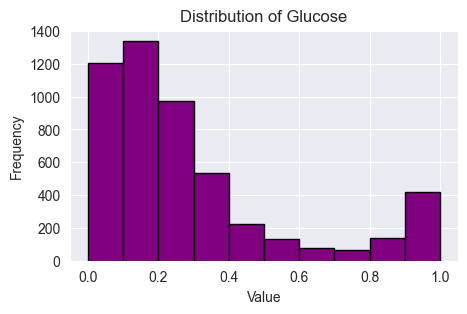

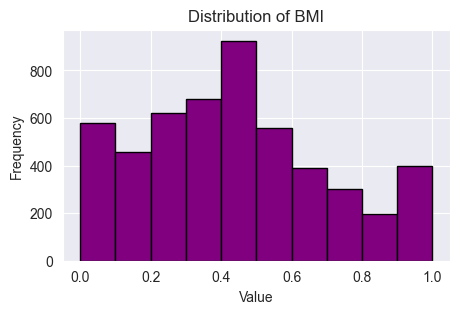

In [90]:
# Visualize the distribution of numerical features

scaled_df['avg_glucose_level_winsorized'].hist(bins=10, color = 'purple', edgecolor='k', figsize=(5,3))
plt.title('Distribution of Glucose')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

scaled_df['bmi_winsorized'].hist(bins=10, color = 'purple', edgecolor='k', figsize=(5,3))
plt.title('Distribution of BMI')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

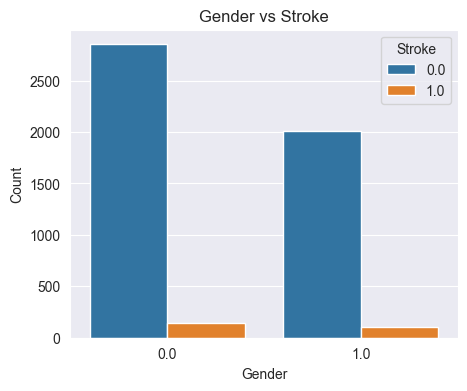

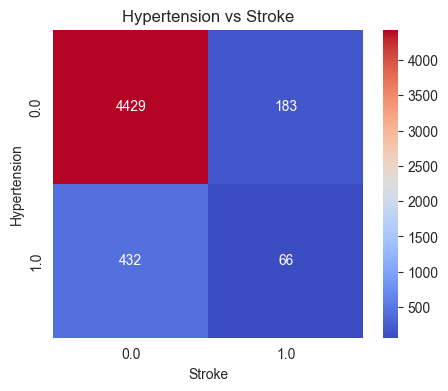

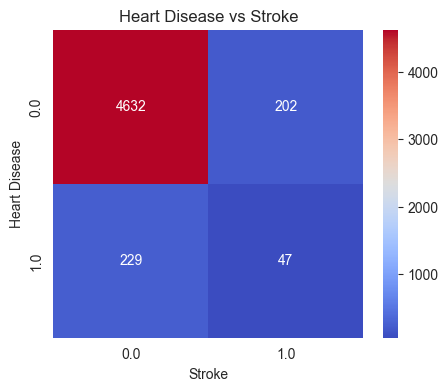

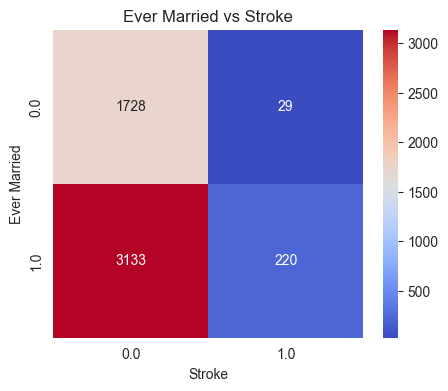

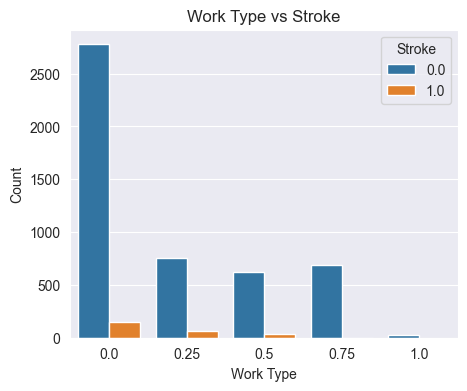

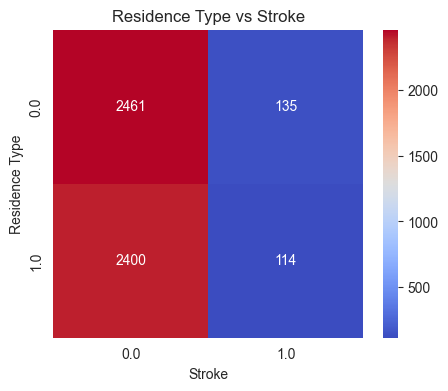

In [91]:
# Analyze the relationship between categorical features (e.g., gender, work_type) and the target variable (stroke).

plt.figure(figsize=(5, 4))
sns.countplot(data=scaled_df, x='gender_encoded', hue='stroke')
plt.title('Gender vs Stroke')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()


pivot_table = pd.crosstab(scaled_df['hypertension'], scaled_df['stroke'])
plt.figure(figsize=(5, 4))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Hypertension vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Hypertension')
plt.show()


pivot_table = pd.crosstab(scaled_df['heart_disease'], scaled_df['stroke'])
plt.figure(figsize=(5, 4))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heart Disease vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Heart Disease')
plt.show()


pivot_table = pd.crosstab(scaled_df['ever_married_encoded'], scaled_df['stroke'])
plt.figure(figsize=(5, 4))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Ever Married vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Ever Married')
plt.show()

plt.figure(figsize=(5, 4))
sns.countplot(data=scaled_df, x='work_type_encoded', hue='stroke')
plt.title('Work Type vs Stroke')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()


pivot_table = pd.crosstab(scaled_df['residence_type_encoded'], scaled_df['stroke'])
plt.figure(figsize=(5, 4))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Residence Type vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Residence Type')
plt.show()

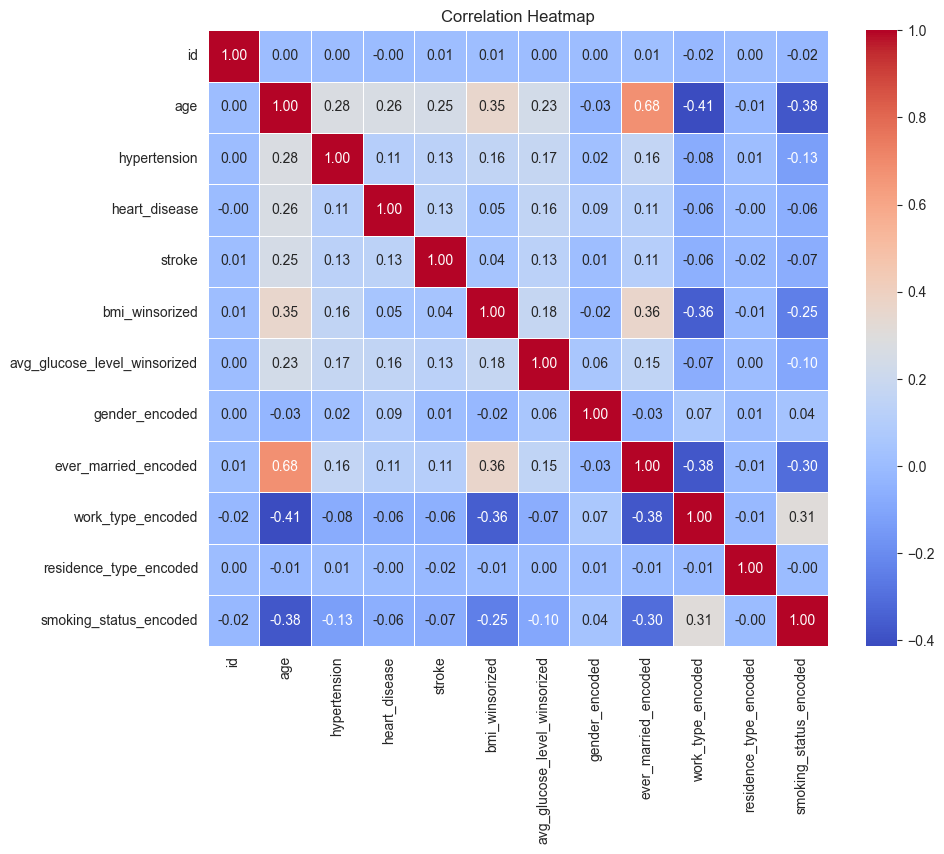

In [92]:
# Plot a correlation heatmap to analyze their relationships.

corr_matrix = scaled_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## 1.3. Data Splitting (5 Pts)

* Manually split the dataset into training (70%) and testing (30%) sets
* Shuffle and split the data
* Avoid using predefined functions like train_test_split for this task


In [93]:
# I shuffled and split data and create x,y pairs and split them into train and test set
df_shuffled = scaled_df.sample(frac=1, random_state=42).reset_index(drop=True)
split_index = int(0.7 * len(df_shuffled))
df_train = df_shuffled.iloc[:split_index]
df_test = df_shuffled.iloc[split_index:]

X_train = df_train.drop(columns =['id','stroke'])
y_train = df_train['stroke']

X_test = df_test.drop(columns=['id','stroke'])
y_test = df_test['stroke']

# Data is imbalanced because of that I use some techniques to handle that problem.

# Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train_smote))

# Combine Oversampling (SMOTE) and Undersampling (Tomek Links)
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)
print("After SMOTE + Tomek Links:", Counter(y_train_smote_tomek))

# Undersampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print("After Random Undersampling:", Counter(y_train_rus))

# I try these 3 methods and according to their Recall, F1-score and other analyze methods, SMOTETomek and SMOTE methods are the best. Because these method's Recall and F1-scores are higher than others.


After SMOTE: Counter({0.0: 3404, 1.0: 3404})
After SMOTE + Tomek Links: Counter({0.0: 3376, 1.0: 3376})
After Random Undersampling: Counter({0.0: 173, 1.0: 173})


# **PART- 2: Model Building (30 points)**

Implement two classification models:

* k-Nearest Neighbors (kNN)
* Logistic Regression


***You can use scikit-learn***




## 2.1. kNN Classifier (15 Pts)
* Build and train the kNN model
* Choose the optimal k value using Minkowski distance with at least two different values for p


{1: [0.883235485975212, 0.8923679060665362, 0.8564905414220483, 0.8688845401174168, 0.8264840182648402, 0.8395303326810176, 0.8160469667318982, 0.8310502283105022, 0.8003913894324853, 0.812133072407045, 0.79191128506197, 0.8023483365949119, 0.7834311806914547, 0.7951728636660144, 0.776908023483366, 0.7906066536203522, 0.7690802348336595, 0.7853881278538812, 0.7632093933463796, 0.7756033920417482], 2: [0.8688845401174168, 0.8806262230919765, 0.837573385518591, 0.8480104370515329, 0.8082191780821918, 0.8180039138943248, 0.7977821265492498, 0.8049575994781474, 0.7788649706457925, 0.7847358121330724, 0.7749510763209393, 0.7840834964122635, 0.7573385518590998, 0.7638617090671885, 0.746249184605349, 0.7527723418134377, 0.741030658838878, 0.7475538160469667, 0.7299412915851272, 0.741030658838878], 3: [0.8656229615133725, 0.8773646444879322, 0.8245270711024135, 0.837573385518591, 0.7938682322243966, 0.8075668623613829, 0.7723418134377038, 0.7893020221787345, 0.7625570776255708, 0.7742987606001

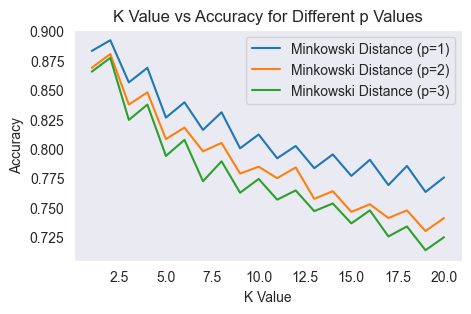

In [94]:
# KNN Classifier Model
# for different p values (different distance measures) and k values for 1-21 range we train knn model and find optimal k. Optimal k has been found with looking best accuracy.
k_values = range(1, 21)
p_values = [1, 2, 3]

results = {}

for p in p_values:
    accuracy_scores = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
        knn.fit(X_train_smote_tomek, y_train_smote_tomek)
        y_pred = knn.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
    results[p] = accuracy_scores

print(results)
# Printing results directly gives us better idea about to find better k and p values.

plt.figure(figsize=(5, 3))
for p, scores in results.items():
    plt.plot(k_values, scores, label=f'Minkowski Distance (p={p})')

plt.title('K Value vs Accuracy for Different p Values')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# optimum k = 10

## 2.2. Logistic Regression (15 Pts)
* Build and train the Logistic Regression model

In [95]:
# Logistic Regression Model

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=23)
log_reg.fit(X_train_smote_tomek, y_train_smote_tomek)

y_pred_log_reg = log_reg.predict(X_test)



# **PART- 3: Model Evaluation (35 points)**



## 3.1 Confusion Matrix (15)

Analysis of the confusion matrices for both models:

* Plot and interpret the confusion matrices
* Display accuracy, precision, recall, and F1-score for both models



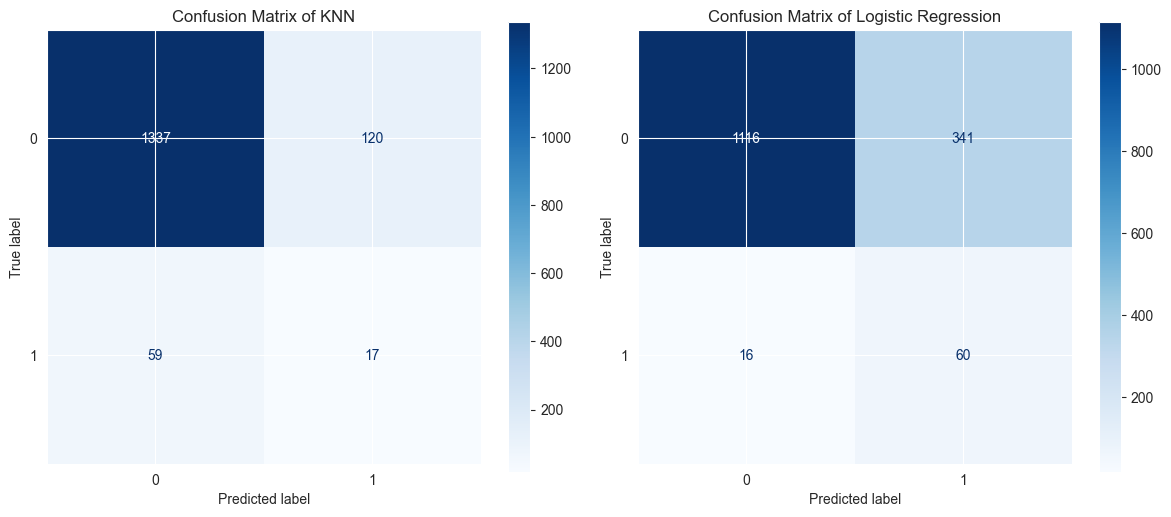

KNN Model Metrics:
Accuracy: 0.883235485975212

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      1457
         1.0       0.12      0.22      0.16        76

    accuracy                           0.88      1533
   macro avg       0.54      0.57      0.55      1533
weighted avg       0.92      0.88      0.90      1533

Logistic Regression Model Metrics:
Accuracy: 0.7671232876712328

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.77      0.86      1457
         1.0       0.15      0.79      0.25        76

    accuracy                           0.77      1533
   macro avg       0.57      0.78      0.56      1533
weighted avg       0.94      0.77      0.83      1533



In [96]:
# Train model with best k and p values
knn_optimal = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=1)
knn_optimal.fit(X_train_smote_tomek, y_train_smote_tomek)
y_pred_knn = knn_optimal.predict(X_test)

# Confusion Matrices of both model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Display confusion matrices of both model
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(conf_matrix_knn).plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Confusion Matrix of KNN')

ConfusionMatrixDisplay(conf_matrix_log_reg).plot(ax=axes[1], cmap='Blues', values_format='d')
axes[1].set_title('Confusion Matrix of Logistic Regression')

plt.tight_layout()
plt.show()

# Metrics for KNN model
print("KNN Model Metrics:")
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn}\n")
print("Classification Report:")
print(classification_rep_knn)

# Metrics for Logistic Regression model
print("Logistic Regression Model Metrics:")
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
classification_rep_log_reg = classification_report(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy_log_reg}\n")
print("Classification Report:")
print(classification_rep_log_reg)

## 3.2 Precision-Recall Curves (5)

Evaluate the Precision-Recall curves for both models:

* Plot and analyze the curves

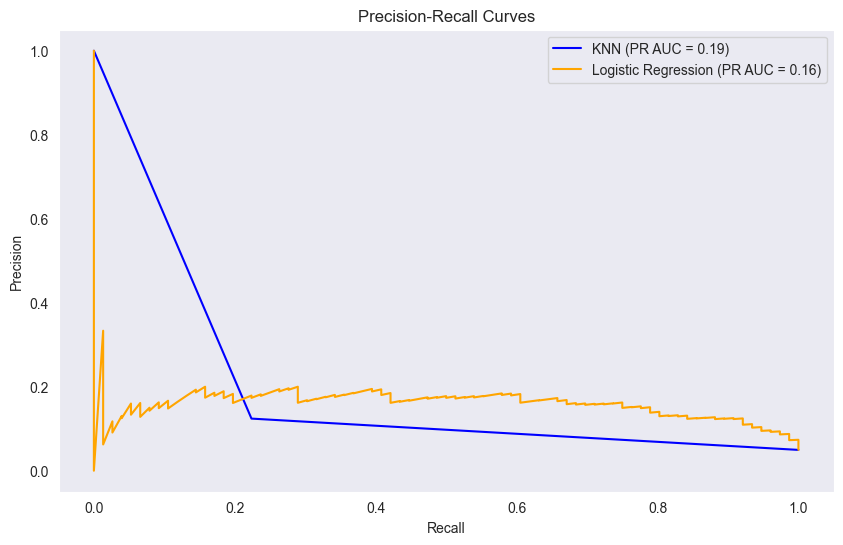

KNN Precision-Recall AUC: 0.19
Logistic Regression Precision-Recall AUC: 0.16


In [97]:
# Find Precision, Recall, Threshold values for KNN, and calculate AUC
y_scores_knn = knn_optimal.predict_proba(X_test)[:, 1]
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, y_scores_knn)
pr_auc_knn = auc(recall_knn, precision_knn)

# Find Precision, Recall, Threshold values for Logistic Regression and calculate AUC
y_scores_log_reg = log_reg.predict_proba(X_test)[:, 1]
precision_log_reg, recall_log_reg, thresholds_log_reg = precision_recall_curve(y_test, y_scores_log_reg)
pr_auc_log_reg = auc(recall_log_reg, precision_log_reg)

# Create Precision-Recall Curve for both model
plt.figure(figsize=(10, 6))
plt.plot(recall_knn, precision_knn, label=f'KNN (PR AUC = {pr_auc_knn:.2f})', color='blue')
plt.plot(recall_log_reg, precision_log_reg, label=f'Logistic Regression (PR AUC = {pr_auc_log_reg:.2f})', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='best')
plt.grid()
plt.show()

print(f"KNN Precision-Recall AUC: {pr_auc_knn:.2f}")
print(f"Logistic Regression Precision-Recall AUC: {pr_auc_log_reg:.2f}")

_## 3.3. Compare the Model (15 Pts)

Prepare a detailed evaluation report with metrics, visualizations, and comparative analysis.

* Compare the performance of kNN and Logistic Regression based on the metrics.

* Discuss which model performs better and hypothesize why.

In [99]:
comparison_data = {
    'Model': ['KNN', 'Logistic Regression'],
    'Precision (1)': [0.12, 0.15],
    'Recall (1)': [0.22, 0.79],
    'F1-Score (1)': [0.16, 0.25],
    'PR AUC': [0.19, 0.16],
    'Accuracy': [0.88, 0.77]
}

comparison_df = pd.DataFrame(comparison_data)

print("KNN and Logistic Regression Comparison Table:")
print(comparison_df)

# KNN analyze: KNN model has higher overall accuracy, that shows us it performs better for the majority class (0). This model has extremely poor performance for the minority class (1). Recall is %22, meaning most minority class samples are misclassified. Precision is %12, showing many FP for the minority class. According to all this analyzes, KNN fails to detect the minority class, even after SMOTE + Tomek Links.

# Logistic Regression Analyzes: Much better Recall for the minority class (%79), which indicates that it correctly identifies a large portion of minority class samples.Lower Precision (15%) means many false positives for the minority class.Logistic Regression is more reliable for imbalanced datasets as it focuses on detecting the minority class. Despite slightly lower accuracy (77%), it achieves better F1-Score (25%) for class 1.

# Logistic Regression is better for this dataset.

KNN and Logistic Regression Comparison Table:
                 Model  Precision (1)  Recall (1)  F1-Score (1)  PR AUC  \
0                  KNN           0.12        0.22          0.16    0.19   
1  Logistic Regression           0.15        0.79          0.25    0.16   

   Accuracy  
0      0.88  
1      0.77  


# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw4.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.